In [1]:
import pandas as pd

# 데이터 파일 불러오기
file_path = 'C:\\Users\\chiholee\\Downloads\\car_data.csv'
car_data = pd


In [2]:
import pandas as pd

# 데이터 파일 로드
file_path = 'C:\\Users\\chiholee\\Downloads\\car_data.csv'
car_data = pd.read_csv(file_path)

# 데이터의 처음 몇 줄과 기본 정보 출력
car_data.info(), car_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      8128 non-null   object 
 1   year                      8128 non-null   int64  
 2   selling_price             8128 non-null   int64  
 3   km_driven                 8128 non-null   int64  
 4   fuel                      8128 non-null   object 
 5   seller_type               8128 non-null   object 
 6   transmission              8128 non-null   object 
 7   owner                     8128 non-null   object 
 8   mileage                   7907 non-null   object 
 9   engine                    7907 non-null   object 
 10  max_power                 7913 non-null   object 
 11  torque                    7906 non-null   object 
 12  seats                     7907 non-null   float64
 13  average_oil_price_jpy     8079 non-null   float64
 14  japan_gd

(None,
                            name  year  selling_price  km_driven    fuel  \
 0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
 1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
 2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
 3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
 4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
 
   seller_type transmission         owner     mileage   engine   max_power  \
 0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
 1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
 2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
 3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
 4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
 
                      torque  seats  average_oil_price_jpy  \
 0 

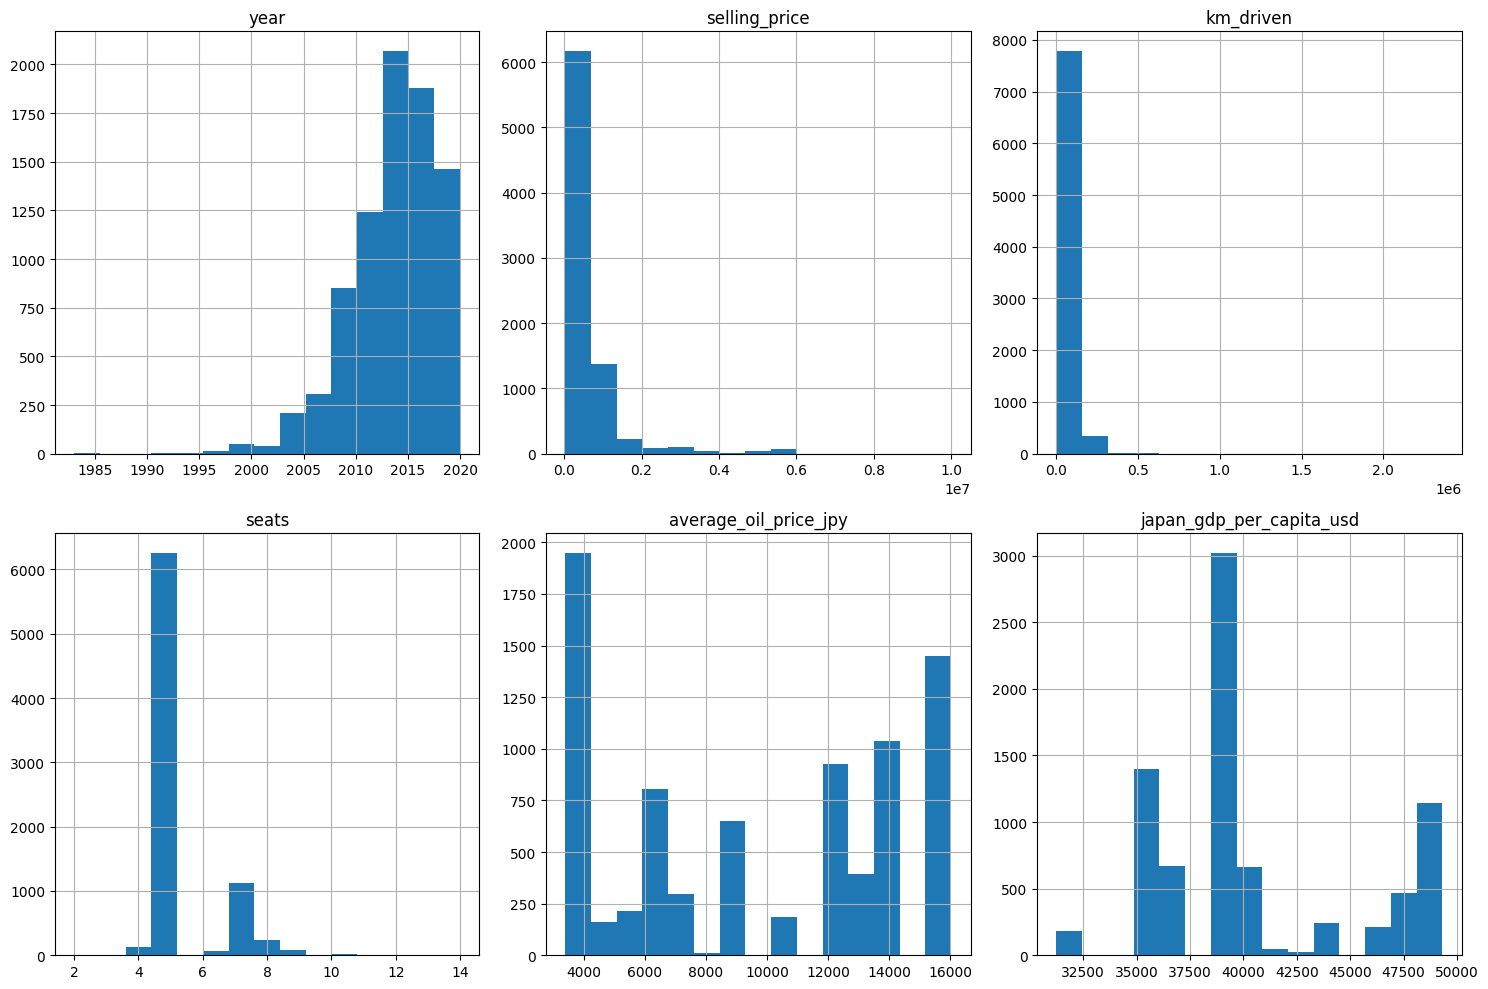

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 데이터의 히스토그램
numerical_features = ['year', 'selling_price', 'km_driven', 'seats', 'average_oil_price_jpy', 'japan_gdp_per_capita_usd']
car_data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 3))

plt.tight_layout()
plt.show()


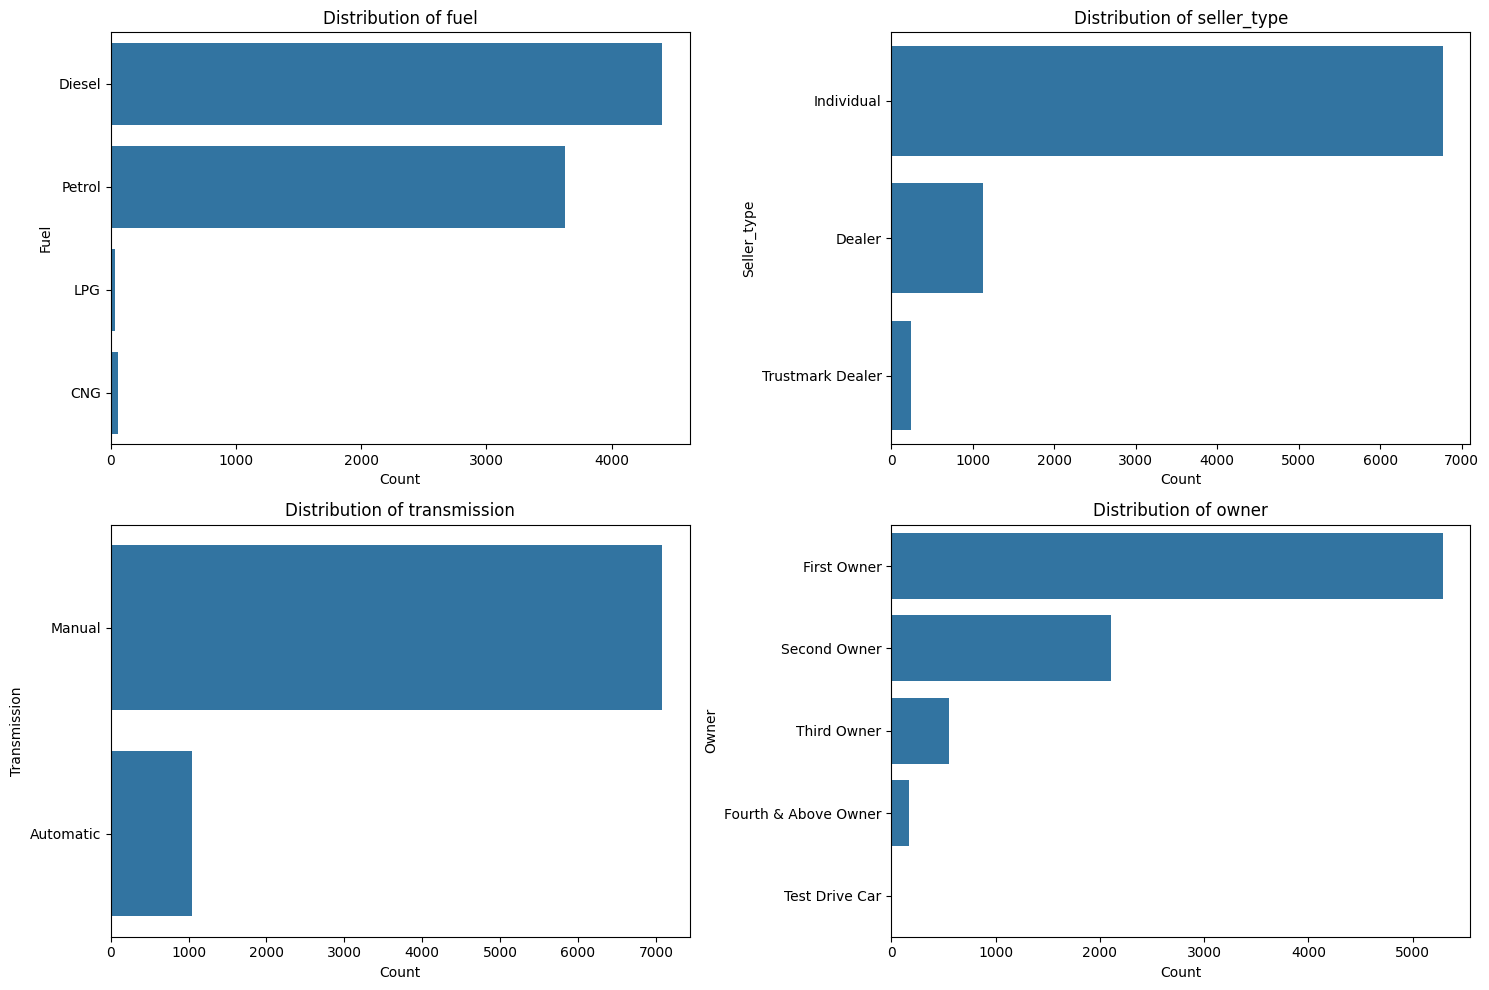

In [4]:
# 범주형 데이터의 바 차트
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=feature, data=car_data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()


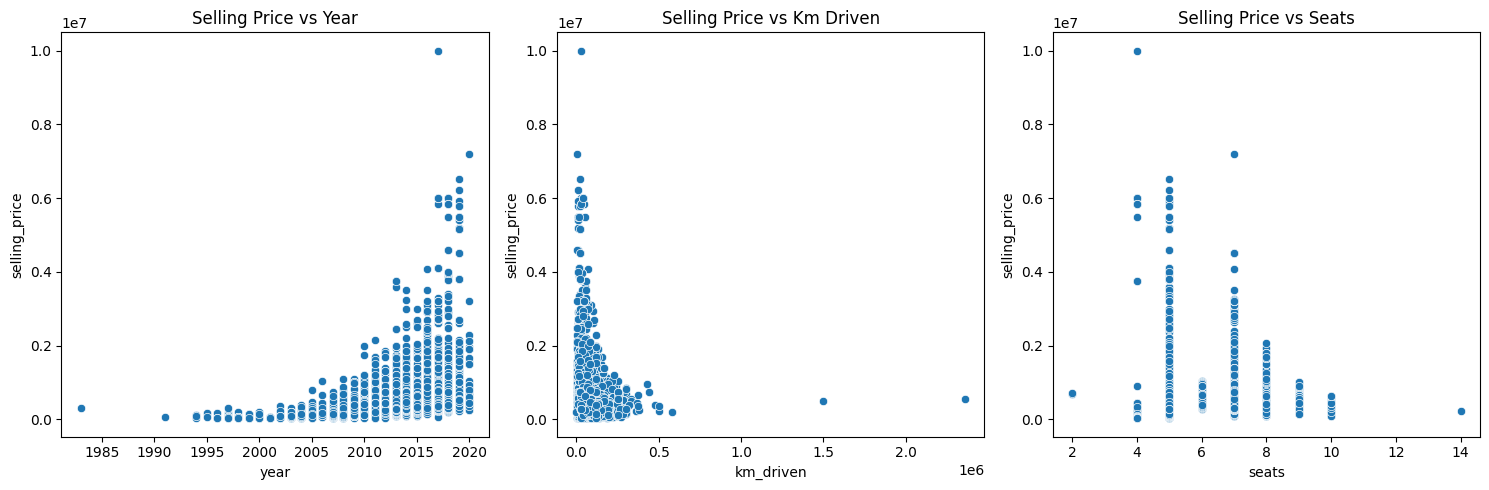

In [5]:
# 판매 가격과 다른 수치형 특성 간의 산점도
plt.figure(figsize=(15, 5))

# 연식과 판매 가격
plt.subplot(1, 3, 1)
sns.scatterplot(x='year', y='selling_price', data=car_data)
plt.title('Selling Price vs Year')

# 주행 거리와 판매 가격
plt.subplot(1, 3, 2)
sns.scatterplot(x='km_driven', y='selling_price', data=car_data)
plt.title('Selling Price vs Km Driven')

# 좌석 수와 판매 가격
plt.subplot(1, 3, 3)
sns.scatterplot(x='seats', y='selling_price', data=car_data)
plt.title('Selling Price vs Seats')

plt.tight_layout()
plt.show()


In [6]:
# 'seller_type', 'owner' 특성 제거
car_data_cleaned = car_data.drop(['seller_type', 'owner'], axis=1)

# 'mileage', 'engine', 'max_power', 'torque' 특성에서 단위 제거
car_data_cleaned['mileage'] = car_data_cleaned['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
car_data_cleaned['engine'] = car_data_cleaned['engine'].str.extract('(\d+)').astype(float)
car_data_cleaned['max_power'] = car_data_cleaned['max_power'].str.extract('(\d+\.\d+|\d+)').astype(float)
car_data_cleaned['torque'] = car_data_cleaned['torque'].str.extract('(\d+\.\d+|\d+)').astype(float)

# 변경된 데이터 확인
car_data_cleaned.head()


,name,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,torque,seats,average_oil_price_jpy,japan_gdp_per_capita_usd
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,23.40,1248.0,74.00,190.0,5.0,3398.526301,38734.94231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,21.14,1498.0,103.52,250.0,5.0,3398.526301,38734.94231
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,17.70,1497.0,78.00,12.7,5.0,12283.822620,48435.27762
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,23.00,1396.0,90.00,22.4,5.0,12864.280270,47096.14768
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,16.10,1298.0,88.20,11.5,5.0,10872.993390,31240.62961


In [7]:
# 누락된 값이 있는 행 제거
car_data_cleaned.dropna(inplace=True)

# 이상치 탐지 및 제거를 위한 함수 정의
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 수치형 특성에 대해 이상치 제거
numerical_cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 
                  'average_oil_price_jpy', 'japan_gdp_per_capita_usd']

for col in numerical_cols:
    car_data_cleaned = remove_outliers(car_data_cleaned, col)

# 정제된 데이터 확인
car_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5280 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      5280 non-null   object 
 1   year                      5280 non-null   int64  
 2   selling_price             5280 non-null   int64  
 3   km_driven                 5280 non-null   int64  
 4   fuel                      5280 non-null   object 
 5   transmission              5280 non-null   object 
 6   mileage                   5280 non-null   float64
 7   engine                    5280 non-null   float64
 8   max_power                 5280 non-null   float64
 9   torque                    5280 non-null   float64
 10  seats                     5280 non-null   float64
 11  average_oil_price_jpy     5280 non-null   float64
 12  japan_gdp_per_capita_usd  5280 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 577.5+ KB


In [8]:
# 'fuel'과 'transmission' 특성에 대해 원-핫 인코딩 적용
car_data_encoded = pd.get_dummies(car_data_cleaned, columns=['fuel', 'transmission'], drop_first=True)

# 인코딩된 데이터 확인
car_data_encoded.head()


,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,average_oil_price_jpy,japan_gdp_per_capita_usd,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,190.0,5.0,3398.526301,38734.94231,True,False,False,True
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,250.0,5.0,3398.526301,38734.94231,True,False,False,True
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,12.7,5.0,12283.822620,48435.27762,False,False,True,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,22.4,5.0,12864.280270,47096.14768,True,False,False,True
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,11.5,5.0,10872.993390,31240.62961,False,False,True,True


In [11]:
from sklearn.preprocessing import StandardScaler

# 수치형 특성 선택 (원-핫 인코딩된 특성 제외)
numerical_cols_for_scaling = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 
                              'average_oil_price_jpy', 'japan_gdp_per_capita_usd']

# 표준화를 위한 스케일러 생성
scaler = StandardScaler()

# 수치형 특성에 대해 표준화 적용
car_data_scaled = car_data_encoded.copy()
car_data_scaled[numerical_cols_for_scaling] = scaler.fit_transform(car_data_scaled[numerical_cols_for_scaling])

# 스케일링된 데이터 확인
car_data_scaled.head()


,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,average_oil_price_jpy,japan_gdp_per_capita_usd,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual
0,Maruti Swift Dzire VDI,-0.061850,0.111065,2.151123,0.769870,0.129667,-0.268843,0.966727,0.0,-1.384616,-0.281754,True,False,False,True
1,Skoda Rapid 1.5 TDI Ambition,-0.061850,-0.245843,1.491222,0.062266,1.335128,1.602496,2.004520,0.0,-1.384616,-0.281754,True,False,False,True
2,Honda City 2017-2020 EXi,-2.371784,-1.191648,2.008792,-1.014795,1.330306,-0.015274,-2.099951,0.0,0.575045,1.808703,False,False,True,True
3,Hyundai i20 Sportz Diesel,-1.216817,-0.892738,1.672371,0.644631,0.843300,0.745433,-1.932174,0.0,0.703066,1.520116,True,False,False,True
4,Maruti Swift VXI BSIII,-2.083043,-1.316566,1.491222,-1.515753,0.370760,0.631327,-2.120707,0.0,0.263886,-1.896806,False,False,True,True


In [15]:
import re

# 수치 데이터 추출 함수
def extract_number_from_string(s):
    if pd.isnull(s):
        return None
    numbers = re.findall(r'\d+\.?\d*', s)  # Find all numbers, including decimals
    return float(numbers[0]) if numbers else None

# 수치형 데이터 추출
car_data['mileage_kmpl'] = car_data['mileage'].apply(extract_number_from_string)
car_data['engine_cc'] = car_data['engine'].apply(extract_number_from_string)
car_data['max_power_bhp'] = car_data['max_power'].apply(extract_number_from_string)
car_data['torque_num'] = car_data['torque'].apply(extract_number_from_string)

# 불필요한 컬럼 제거 및 누락된 값 처리
car_data_cleaned = car_data.drop(columns=['mileage', 'engine', 'max_power', 'torque']).dropna()

# 범주형 데이터 인코딩
car_data_encoded = pd.get_dummies(car_data_cleaned, columns=['fuel', 'seller_type', 'transmission', 'owner'])

# 'brand' 컬럼 추가
car_data_encoded['brand'] = car_data_encoded['name'].apply(lambda name: name.split()[0])

# 'name' 컬럼 제거
car_data_with_brands = car_data_encoded.drop('name', axis=1)

# 'brand' 컬럼에 대한 원-핫 인코딩
car_data_with_brands_encoded = pd.get_dummies(car_data_with_brands, columns=['brand'])

# 인코딩된 데이터 확인
car_data_with_brands_encoded.head()


,year,selling_price,km_driven,seats,average_oil_price_jpy,japan_gdp_per_capita_usd,mileage_kmpl,engine_cc,max_power_bhp,torque_num,...,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,450000,145500,5.0,3398.526301,38734.94231,23.40,1248.0,74.00,190.0,...,True,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,5.0,3398.526301,38734.94231,21.14,1498.0,103.52,250.0,...,False,False,False,False,False,True,False,False,False,False
2,2006,158000,140000,5.0,12283.822620,48435.27762,17.70,1497.0,78.00,12.7,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,5.0,12864.280270,47096.14768,23.00,1396.0,90.00,22.4,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,120000,5.0,10872.993390,31240.62961,16.10,1298.0,88.20,11.5,...,True,False,False,False,False,False,False,False,False,False


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 수치형 특성 선택
numerical_features = ['year', 'km_driven', 'seats', 'average_oil_price_jpy',
                      'japan_gdp_per_capita_usd', 'mileage_kmpl', 'engine_cc',
                      'max_power_bhp', 'torque_num']

# 수치형 데이터 파이프라인
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# 전체 데이터에 대한 파이프라인
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features)
    # 범주형 특성 파이프라인은 여기에 추가 (해당 경우에 따라 다름)
])

# 파이프라인을 데이터에 적용
car_data_prepared = preprocessor.fit_transform(car_data_with_brands_encoded)


In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 선형 회귀 모델 생성
lin_reg = LinearRegression()

# 삼중 교차 검증을 위한 점수 계산
scores = []
for _ in range(3):
    cross_scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-cross_scores)
    scores.append(rmse_scores)

# 삼중 교차 검증 결과
scores = np.array(scores)
mean_scores = scores.mean(axis=0)
print("Triple Cross-Validation RMSE scores:", mean_scores)
print("Mean:", mean_scores.mean())


Triple Cross-Validation RMSE scores: [381621.32568666 262325.65015921 312566.20760696 319291.10111552
 260938.86881589 323703.39977264 388000.90496901 318727.52517377
 267379.61763654 349335.37899888]
Mean: 318388.99799350806


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 랜덤 포레스트 회귀 모델 생성
rf_reg = RandomForestRegressor(random_state=42)

# 삼중 교차 검증을 위한 RMSE 점수 계산
rmse_scores = []
for _ in range(3):
    cross_scores = cross_val_score(rf_reg, X, y, scoring='neg_mean_squared_error', cv=10)
    rmse_scores.append(np.sqrt(-cross_scores))  # RMSE 점수 계산

# 삼중 교차 검증 결과
rmse_scores = np.array(rmse_scores)
mean_rmse_scores = rmse_scores.mean(axis=0)
print("Random Forest Triple Cross-Validation RMSE scores:", mean_rmse_scores)
print("Mean RMSE:", mean_rmse_scores.mean())


Random Forest Triple Cross-Validation RMSE scores: [213745.56052261  96505.66537339 124192.77025178 145553.98038859
  97326.869445   133548.91311473 194783.46500704 114073.79801219
 108790.8673694  165696.60569059]
Mean RMSE: 139421.84951753248


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 결정 트리 회귀 모델 생성
dt_reg = DecisionTreeRegressor(random_state=42)

# 삼중 교차 검증을 위한 RMSE 점수 계산
rmse_scores = []
for _ in range(3):
    cross_scores = cross_val_score(dt_reg, X, y, scoring='neg_mean_squared_error', cv=10)
    rmse_scores.append(np.sqrt(-cross_scores))  # RMSE 점수 계산

# 삼중 교차 검증 결과
rmse_scores = np.array(rmse_scores)
mean_rmse_scores = rmse_scores.mean(axis=0)
print("Decision Tree Triple Cross-Validation RMSE scores:", mean_rmse_scores)
print("Mean RMSE:", mean_rmse_scores.mean())


Decision Tree Triple Cross-Validation RMSE scores: [199902.60752454 105089.78600658 142899.15714586 151048.72236597
 136545.04936357 159904.54191602 271869.52354061 157048.24906975
 138958.92018163 254463.83483959]
Mean RMSE: 171773.03919541262


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# 하이퍼파라미터 분포 설정
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['sqrt', 'log2'],  # 'auto'를 'sqrt'로 변경
    'max_depth': randint(10, 30),
    # 여기에 더 많은 분포를 추가할 수 있습니다.
}

# 랜덤 포레스트 모델
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# 랜덤 서치 수행
random_search.fit(X_train, y_train)




RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002033EB18D90>,
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020342E77210>},
                   random_state=42, scoring='neg_mean_squared_error')

In [32]:
from sklearn.metrics import mean_squared_error

# 최적의 하이퍼파라미터 조합 확인
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# 최적의 하이퍼파라미터로 구성된 모델
best_model = random_search.best_estimator_

# 테스트 세트에서 모델 평가
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Test RMSE of the best model:", rmse)


Best Hyperparameters: {'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 148}
Test RMSE of the best model: 113903.82526376068
